# Analysis and Visualization of Top 50 Bestselling Books in Amazon

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import the Data

In [2]:
book = pd.read_csv('bestsellers with categories.csv')
book.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Investigate the Data

In [3]:
print(book.shape)
print(book.size)

(550, 7)
3850


In [4]:
book.isnull().sum()

# The data is pretty clear, No Null Value

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [5]:
# Checking the Data Type

print(book.dtypes)

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object


# Analysis and Visualization

### Questions

1. Who (the writer) has the most book sold in Amazon?
2. How many fiction or non-fiction book comparison?
3. Visualize the year of Books!
4. Visualize the distribution plot of Rating!

### 1. Who (the writer) has the most book sold as Top 50 Sold Books Amazon?

In [6]:
top_author = book.groupby('Author').nunique()

top_author.sort_values('Name', ascending=False).head(10)

top_author = top_author.sort_values('Name', ascending=False).head(10)

In [7]:
top_author

,Name,User Rating,Reviews,Price,Year,Genre
Author,,,,,,
Jeff Kinney,12,3,12,7,11,1
Rick Riordan,10,3,10,6,6,1
Stephenie Meyer,7,2,6,7,2,1
J.K. Rowling,6,4,6,4,3,1
Bill O'Reilly,6,4,6,5,6,1
Dav Pilkey,6,1,6,3,3,1
E L James,5,3,5,4,3,1
John Grisham,5,3,5,3,5,1
Suzanne Collins,5,3,4,4,3,1


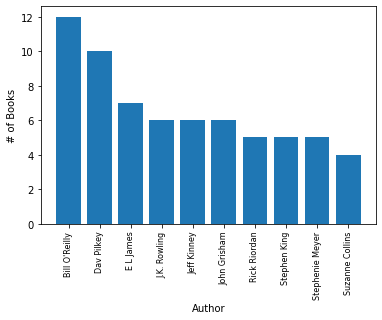

In [8]:
authors = [author for author, df in top_author.groupby('Author')]

plt.bar(authors, top_author['Name'])
plt.xticks(authors, rotation='vertical', size=8)
plt.ylabel('# of Books')
plt.xlabel('Author')
plt.show()

### Question 2: How many fiction or non-fiction book comparison?

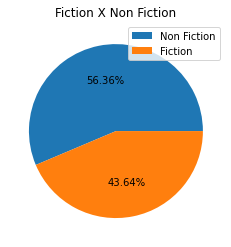

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [9]:
cmpr = book['Genre'].value_counts(normalize=True)
cmpr = cmpr*100
cmpr.map("{:,.2f}%".format)

plt.pie(cmpr, autopct='%1.2f%%')
plt.legend(['Non Fiction', 'Fiction'])
plt.title('Fiction X Non Fiction')
plt.show()
book['Genre'].value_counts()

### Question 3: Visualize the Year of Books!

In [10]:
mean = book.groupby('Year').mean()
book.groupby('Year').mean()

,User Rating,Reviews,Price
Year,,,
2009,4.584,4710.12,15.40
2010,4.558,5479.62,13.48
2011,4.558,8100.82,15.10
2012,4.532,13090.92,15.30
2013,4.554,13098.14,14.60
2014,4.622,15859.94,14.64
2015,4.648,14233.38,10.42
2016,4.678,14196.00,13.18
2017,4.660,12888.40,11.38


In [11]:
median = book.groupby('Year').median()
book.groupby('Year').median()

,User Rating,Reviews,Price
Year,,,
2009,4.60,3780.0,12.0
2010,4.60,2638.5,12.5
2011,4.60,5184.0,13.0
2012,4.60,9333.5,13.0
2013,4.60,7094.0,12.5
2014,4.65,10514.0,10.0
2015,4.70,9144.0,9.0
2016,4.70,10545.0,9.0
2017,4.70,10560.5,9.0


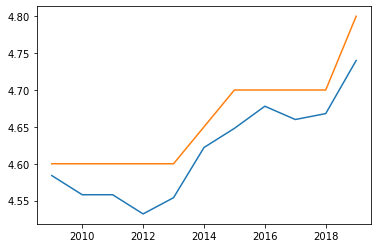

In [12]:
plt.plot(mean['User Rating'])
plt.plot(median['User Rating'])
plt.show()

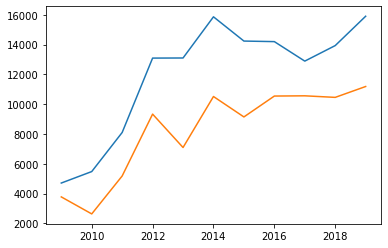

In [13]:
plt.plot(mean['Reviews'])
plt.plot(median['Reviews'])
plt.show()

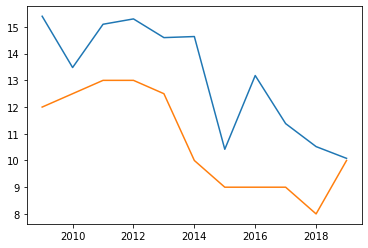

In [14]:
plt.plot(mean['Price'])
plt.plot(median['Price'])
plt.show()

In [15]:
# serie1 = book[book['Genre']=='Fiction'].groupby(['Year','Genre']).count()[['Name']]
# serie1